In [ ]:
#Refernce to these code is: https://github.com/deep-learning-with-pytorch/dlwpt-code

In [2]:
import torch.nn as nn
import torch
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
from collections import OrderedDict

<h2>Chapter 5: The mechanics of learning:</h2>
    <ul>
        <li>Learning is fitting data or making algorithm to learn from data </li>
        <li>Fitting model involves a function with number of unknown parameters whose values are estimated from data. 
    That function in short is called <b> model </b> </li>
        <li>Simple model in this chapter is defined as a model with bias and weight. 
        To optimize weights, a change in weight (gradient of error with respect to the parameters) is 
        computed using chain rule for derivative of composite function (backward pass) </li>
    </ul>

<h2>Overview:</h2>
<ul>
    <li> This chapter starts with explanation about how a model learns.</li>
    <li> Explains that learning is actually just a parameter estimation which happens using differentiation and gradianet descent. </li>
    <li> Simple learning algorithm which is called linear model, is explained. </li>
    <li> Pytorch supports learning with autograd </li>
</ul>

<h3>Dataset:</h3>
<ul>
    <li> 11 datapoints are gathered by making note of temperature data in old celcius (t_c). 
    And measurement from new thermometer (t_u) </li>
    <li><span style="color:Tomato;"><b>Note:</b></span> Simple linear model is used here.</li>
</ul>
    

###  Learning is just a parameter estimation ###

In order to optimize the parameter of the model—its weights—the change in
the error following a unit change in weights (that is, the gradient of the error with
respect to the parameters) is computed using the chain rule for the derivative of a
composite function (backward pass).

### The steps to Fit the model to the input training instances are followed here: ###

### Prepare input data ###

We start by making a note of temperature data in good old Celsius and measurements(inputs) from our new thermometer (target), 
and figure things out.

In [3]:
# t_c are values in celsius
# t_u are values in unknown unit

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### Prediction using simple model ###

In [ ]:
Any model needs weight and bias. Weight and bias are two very common terms for linear
scaling and the additive constant and will be used a lot. Here we defined weights to be 1 and bias 0 values. 
We are looking for making a model that makes <span style='background-color:#FFFF00;'> less loss </span>. 
Considering that here we have linear model, the loss as a function of w and b is also convex. 
In less complex model we are able to find global minima as explaind in this <a href='https://www.youtube.com/watch?v=JLk0ee_zuOM'>link</a>, 
however on more complex models such as neural network models finding gobal minima is not feasible 
and we end up finding optimal local minima.


In [4]:
def model(t_u,w,b):
    return w*t_u+b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

w=torch.ones(())
b=torch.zeros(())

t_p=model(t_u,w,b)

print("predictions are :",t_p)

loss=loss_fn(t_p,t_c)
print("loss is :", loss)



predictions are : tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
loss is : tensor(1763.8848)


We are building a tensor of differences, taking their square element-wise,
and finally producing a scalar loss function by averaging all of the elements in the resulting tensor. 
It is a <span style='background-color:#FFFF00;'> mean square loss </span>.

### Prepare model with Gradient descend loss and epochs ## 

We iteratively apply updates to parameters for a fixed number of iterations,or until w and b stop changing. 
Specfiically here, we use stochastic gradient descent to update parameters for a fixed number of epochs(iterations).
In this <a href= 'https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/'>link</a> the difference between sample, 
batch and epoch is explained. In short, The batch size is a number of samples processed before the model is updated. 
The number of epochs is the number of complete passes through the training dataset.

In [19]:
delta=0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
learning_rate=1e-2
w = w - learning_rate * loss_rate_of_change_w
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def model(t_u, w, b):
    return w * t_u + b

def dmodel_dw(t_u,w,b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params,t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params


### Fit the model on Normalized inputs ###

If we train model with raw data, the gradients of weight and bias would be very large as they will be on different scales. 
As a result, learning rate that is large enough to meaningfully update one will be so large as to be unstable for the other.
In order to reduce the range of input, we need to <span style='background-color:#FFFF00;'> normalize data </span>. 
Normaliization is an effective and easy way to improve model convergence. 
Model converges mean that the loss of learning goes to zero and data points exactly sit on line.

In [28]:
#The learning rate is one of the things we typically change when training does not go as well as we would like.

t_un = 0.1 * t_u

training_loop (
              n_epochs=5,
              learning_rate=1e-4,
              params=torch.tensor([1.0,0.0]),
              t_u=t_un,t_c=t_c
              )

Epoch 1, Loss 80.364342
Epoch 2, Loss 79.752480
Epoch 3, Loss 79.148026
Epoch 4, Loss 78.550865
Epoch 5, Loss 77.960899


tensor([1.0383, 0.0052])

In [29]:
#Let’s run the loop for enough iterations to see the changes in params get small.

params =  training_loop (
                        n_epochs = 10,
                        learning_rate = 1e-2,
                        params = torch.tensor([1.0, 0.0]),
                        t_u = t_un,
                        t_c = t_c,
                        );


t_p=model(t_un,*params)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489


In [ ]:
We trained on unknown units and made prediction. Circles are our input data (celcius) and line is our fitted model.

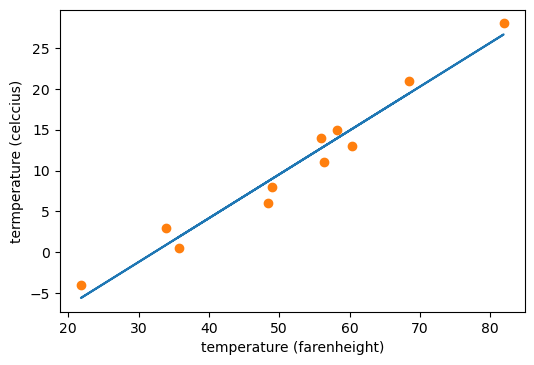

In [27]:
%matplotlib inline
fit=plt.figure(dpi=100)
plt.xlabel("temperature (farenheight)")
plt.ylabel("termperature (celccius)")
plt.plot(t_u.numpy(),t_p.detach().numpy())
plt.plot(t_u.numpy(),t_c.numpy(),'o' )

### Pytorch Autograd ###

PyTorch tensors can remember where they come from, in terms of the operations and
parent tensors that originated them, and they can automatically provide the chain of
derivatives of such operations with respect to their inputs. As a result, 
PyTorch will automatically provide the gradient of that expression with respect to its
input parameters.

In [14]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [15]:
# using requires_grad=True, the grad attribute of params contains the derivatives of the loss with respect to each element of params.

params= training_loop (
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
    );
params

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

### Optimizers ###

PyTorch abstracts the optimization strategy away from user code:
that is, the training loop we’ve examined. This saves us from the boilerplate busywork
of having to update each and every parameter to our model ourselves. The torch
module has an optim submodule where we can find classes implementing different
optimization algorithms.

In [16]:
import torch.optim as optim

dir(optim)[:10]

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam']

SGD is one of the optimziers. It stands for stochastic gradient descent. Actually, the optimizer itself is exactly a
vanilla gradient descent (as long as the momentum argument is set to 0.0, which is the
default). The term stochastic comes from the fact that the gradient is typically obtained
by averaging over a random subset of all input samples, called a minibatch.

### Split data into train,val, test set ###

A highly adaptable model will tend to use its many parameters to make
sure the loss is minimal at the data points, it is called overfitting. We will have no guarantee that the model
behaves well away from or in between the data points. 
The first action we can take to combat overfitting is recognizing that it might happen.
In order to do so, we must take a few data points
out of our dataset (the validation set) and only fit our model on the remaining data
points (the training set). 

<span style='background-color:#FFFF00;'> There are two rules to detect overfitting of model: </span>
<ul>
<li> 1. If training loss is not decreasing, the model is overfitting.</li>
<li> 2. In model learning, if the training loss and the validation loss diverge, we’re overfitting.</li>
</ul>

<span style='background-color:#FFFF00;'> Cures for overfitting of model: </span>
<ul>
<li> Add penalization term to loss function to make it cheaper for model to behave more smoothly and change more slowly</li>
<li> Add noise to the input samples, to artificially create new data
points in between training data samples and force the model to try to fit those, too. </li>
<li> Increase the size of nn until it fits and then scale it down until it stops overfitting. </li>
</ul>

In [57]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u


def training_loop(n_epochs, optimizer,params, train_t_u,val_t_u,
                  train_t_c,val_t_c):
    for epoch in range(1,n_epochs+1):
        train_t_p=model(train_t_u,*params)
        train_loss=loss_fn(train_t_p,train_t_c)
        
        with torch.no_grad():
            val_t_p=model(val_t_u,*params)
            val_loss=loss_fn(val_t_p,val_t_c)
            assert val_loss.requires_grad==False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step() 
        
        if epoch<=3 or epoch % 500==0:
            print(f"epoch {epoch},Training loss  {train_loss.item():.4f}"
            ,
                 f" validation loss {val_loss.item():.4f}")
    return params



In [58]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop (
            n_epochs = 3000,
            optimizer = optimizer,
            params = params,
            train_t_u = train_t_un,
            val_t_u = val_t_un,
            train_t_c = train_t_c,
            val_t_c = val_t_c
        )

epoch 1,Training loss  90.7754  validation loss 33.5146
epoch 2,Training loss  33.7982  validation loss 34.4394
epoch 3,Training loss  27.0283  validation loss 42.0913
epoch 500,Training loss  9.4832  validation loss 10.2596
epoch 1000,Training loss  4.6468  validation loss 2.7845
epoch 1500,Training loss  3.2565  validation loss 2.4603
epoch 2000,Training loss  2.8569  validation loss 3.3453
epoch 2500,Training loss  2.7420  validation loss 4.1242
epoch 3000,Training loss  2.7090  validation loss 4.6294


tensor([  5.5929, -18.4719], requires_grad=True)

<h2> Review of Chapter 5 </h2>
<ul>
<li>This chapter covers the mechanics of training neural networks using backpropagation and stochastic gradient descent.</li>
<li> The chapter starts by introducing the concept of loss functions, which measure the difference between the predicted output and the ground truth. 
The authors explain different types of loss functions and how to choose the appropriate one for a given task.</li>
<li> The authors then introduce the backpropagation algorithm, which is used to compute the gradients of the loss function with respect to the parameters of the model. 
They explain how to implement backpropagation in PyTorch using automatic differentiation.</li>
<li> Next, the chapter covers the concept of optimization algorithms, which are used to update the model parameters based on the computed gradients. 
The authors explain different optimization algorithms, such as stochastic gradient descent, Adam, and Adagrad, and provide examples of how to use them in PyTorch. </li>
<li> The chapter then explains the concept of learning rate, which determines the step size in the parameter update process. 
The authors discuss different strategies for setting the learning rate, such as using a fixed learning rate, using a learning rate schedule, or using adaptive learning rates.</li>
<li> Finally, the chapter covers the concept of regularization, which is used to prevent overfitting in neural networks. 
The authors explain different regularization techniques, such as L1 and L2 regularization, dropout, and early stopping.</li>
</ul> 
Overall, Chapter 5 of "Deep Learning with PyTorch" provides a comprehensive introduction to the mechanics of training neural networks, making it a valuable resource for anyone interested in understanding the basics of deep learning.
